### **Team01 Project Members :**
#### - Djika Asmaou Houma, 22347009
#### - Dina Valdez Camille Chazeaud, 22347012

## **Topic : Used Cars Price Prediction**

---------------
## **Context**
---------------
There is always a huge demand for used cars in developing economies, such as the Indian car market. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. 

In 2022, the global market for used cars was estimated at USD 1.66 trillion, with expectations to expand at a compound annual growth rate (CAGR) of 6.1% from 2023 to 2030. In 2021, the industry saw shipments of approximately 120.3 million units. Recent years have marked considerable growth in this sector, primarily driven by competitive pricing strategies introduced by new market entrants. Additionally, a shift in consumer behavior, with many opting for used over new vehicles due to affordability concerns, has significantly boosted sales volumes. This trend is further supported by substantial investments from industry players in expanding dealership networks, enhancing the branding and viability of used car options. This backdrop sets the stage for our project on predicting used car prices, aiming to understand and forecast pricing dynamics within this thriving market.

-----------------
## **Objective**
-----------------
* Explore, analyze and visualize the dataset.
* Build a model to predict the prices of used cars.
* Generate a set of insights and recommendations.

-----------------
## **The key question**
-----------------
* Which factors would affect the price of used cars?

-----------------
## **Data Collection**
-----------------
The dataset used in this project was obtained from Kaggle (https://www.kaggle.com/code/billumillu/used-car-price-prediction-in-india )


## **Data Dictionary**
-----------------

**S.No.**: Serial Number

**Name**: Name of the car which includes Brand name and Model name

**Location**: The location in which the car is being sold or is available for purchase (Cities)

**Year**: Manufacturing year of the car

**Kilometers_driven**: The total kilometers driven in the car by the previous owner(s) in KM.

**Fuel_Type**: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

**Transmission**: The type of transmission used by the car. (Automatic / Manual)

**Owner**: Type of ownership

**Mileage**: The standard mileage offered by the car company in kmpl or km/kg

**Engine**: The displacement volume of the engine in CC.

**Power**: The maximum power of the engine in bhp.

**Seats**: The number of seats in the car.

**New_Price**: The price of a new car of the same model(e.gs INR 100,00), (INR = Indian Rupee)

**Price**: The price of the used car e.g  INR 100,000 (**Target Variable**)

## **Importing the necessary libraries**

In [3]:
# Used to ignore the warning given as output of the code
import warnings                                                  
warnings.filterwarnings('ignore')

# Libraries of python for numeric and dataframe manipulations
import numpy as np                                              
import pandas as pd

# Library for data visualization
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline

#module for regression analysis
from statsmodels.formula.api import ols 

#module for evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error  

#checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#checking for Heteroscedasticity
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

#qqplot for residuals to check Normality
import statsmodels.api as sm 

#statistical tests used to assess different aspects of a dataset's distribution, specifically its normality
from scipy.stats import jarque_bera
from scipy.stats import kstest
from scipy.stats import shapiro

In [4]:
# Removes the limit from the number of displayed columns and rows 
# When we print the dataframe, we can see the entire dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

## **Exploring the Data**

### **Loading the data**


In [7]:
#loading data set and displaying first 5 rows
used_cars_df = pd.read_csv("used_cars_data.csv")
used_cars_df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [8]:
#checking the data size
used_cars_df.shape

(7253, 14)

In [9]:
#checking data information
used_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


- `S.No.` is just an index for the data entry. This column will not be a significant factor in determining the price of the car.
  
- `Name` car names which contain a lot of model information. 

- `Mileage`, `Engine`, and `Power` will also need some processing before we are able to explore them. We'll have to extract numerical information from these columns.

- `New Price` column also needs some processing. This one also contains strings and a lot of missing values.

- `Mileage`, `Engine`, `Power` and `New_Price` are objects when they should ideally be numerical. To be able to get summary statistics for these columns, we will have to process them first.

### **Processing Columns**

#### **1. Mileage**

- We have car mileage in two units, kmpl and km/kg.
- kmpl - kilometers per litre - is used for petrol and diesel cars.
 -km/kg - kilometers per kg - is used for CNG and LPG-based engines.

**Checking if these observations hold true in our data also.**

In [14]:
# Creating new columns after splitting the mileage values.
km_per_unit_fuel = []
mileage_unit = []

for observation in used_cars_df["Mileage"]:
    if isinstance(observation, str):
        if (
            observation.split(" ")[0]
            .replace(".", "", 1)
            .isdigit()  # First element should be numeric
            and " " in observation  # Space between numeric and unit
            and (
                observation.split(" ")[1]
                == "kmpl"  # Units are limited to "kmpl" and "km/kg"
                or observation.split(" ")[1] == "km/kg"
            )
        ):
            km_per_unit_fuel.append(float(observation.split(" ")[0]))
            mileage_unit.append(observation.split(" ")[1])
        else:
            # To detect if there are any observations in the column that do not follow
            # The expected format [number + ' ' + 'kmpl' or 'km/kg']
            print(
                "The data needs further processing. All values are not similar ",
                observation,
            )
    else:
        # If there are any missing values in the mileage column,
        # We add corresponding missing values to the 2 new columns
        km_per_unit_fuel.append(np.nan)
        mileage_unit.append(np.nan)

In [15]:

# Add the new columns to the data
used_cars_df["km_per_unit_fuel"] = km_per_unit_fuel
used_cars_df["mileage_unit"] = mileage_unit

# Checking the new dataframe
used_cars_df.head(5)  

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl


In [16]:
# Checking if the units correspond to the fuel types as expected.
used_cars_df.groupby(by = ["Fuel_Type", "mileage_unit"]).size()

Fuel_Type  mileage_unit
CNG        km/kg             62
Diesel     kmpl            3852
LPG        km/kg             12
Petrol     kmpl            3325
dtype: int64

- As expected, km/kg is for CNG/LPG cars and kmpl is for Petrol and Diesel cars.

#### **2. Engine**

The data dictionary suggests that `Engine` indicates the displacement volume of the engine in CC.
We will make sure that all the observations follow the same format - [numeric + " " + "CC"] and create a new numeric column from this column. 

We'll use a **regex** to make all the necessary checks.


In [19]:
# re module provides support for regular expressions
import re

# Create a new column after splitting the engine values.
engine_num = []

# Regex for numeric + " " + "CC"  format
regex_engine = "^\d+(\.\d+)? CC$"

for observation in used_cars_df["Engine"]:
    if isinstance(observation, str):
        if re.match(regex_engine, observation):
            engine_num.append(float(observation.split(" ")[0]))
        else:
            # To detect if there are any observations in the column that do not follow [numeric + " " + "CC"]  format
            print(
                "The data needs furthur processing. All values are not similar ",
                observation,
            )
    else:
        # If there are any missing values in the engine column, we add missing values to the new column
        engine_num.append(np.nan)

In [20]:

# Add the new column to the data
used_cars_df["engine_num"] = engine_num

# Checking the new dataframe
used_cars_df.head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg,998.0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,1582.0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl,1199.0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl,1248.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl,1968.0


#### **3. Power**

The data dictionary suggests that `Power` indicates the maximum power of the engine in bhp.
We will make sure that all the observations follow the same format - [numeric + " " + "bhp"] and create a new numeric column from this column, like we did for `Engine`.

In [22]:
# Create a new column after splitting the power values
power_num = []

# Regex for numeric + " " + "bhp"  format
regex_power = "^\d+(\.\d+)? bhp$"

for observation in used_cars_df["Power"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            power_num.append(float(observation.split(" ")[0]))
        else:
            # To detect if there are any observations in the column that do not follow [numeric + " " + "bhp"]  format
            # That we see in the sample output
            print(
                "The data needs furthur processing. All values are not similar ",
                observation,
            )
    else:
        # If there are any missing values in the power column, we add missing values to the new column
        power_num.append(np.nan)

The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  n

We can see that some Null values in power column exist as 'null bhp' string.
Let us replace these with NaNs

In [24]:
# replacing all the 'null bhp' in Power column by NaN
power_num = []

for observation in used_cars_df["Power"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            power_num.append(float(observation.split(" ")[0]))
        else:
            power_num.append(np.nan)
    else:
        # If there are any missing values in the power column, we add missing values to the new column
        power_num.append(np.nan)

# Add the new column to the data
used_cars_df["power_num"] = power_num

# Checking the new dataframe
used_cars_df.head(10)  

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg,998.0,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,1582.0,126.20
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl,1199.0,88.70
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl,1248.0,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl,1968.0,140.80
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35,21.10,km/kg,814.0,55.20
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,23.08,kmpl,1461.0,63.10
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50,11.36,kmpl,2755.0,171.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20,20.54,kmpl,1598.0,103.60
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95,22.30,kmpl,1248.0,74.00


#### **4. New_Price**

We know that `New_Price` is the price of a new car of the same model in INR Lakhs (1 Lakh = 100, 000). We will extract the numeric values from this column.

In [26]:
# Create a new column after splitting the New_Price values.
new_price_num = []

# Regex for numeric + " " + "Lakh"  format
regex_power = "^\d+(\.\d+)? Lakh$"

for observation in used_cars_df["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # To detect if there are any observations in the column that do not follow [numeric + " " + "Lakh"]  format
            # That we see in the sample output
            print(
                "The data needs furthur processing. All values are not similar ",
                observation,
            )
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

The data needs furthur processing. All values are not similar  1.28 Cr
The data needs furthur processing. All values are not similar  1.04 Cr
The data needs furthur processing. All values are not similar  1 Cr
The data needs furthur processing. All values are not similar  1.04 Cr
The data needs furthur processing. All values are not similar  1.39 Cr
The data needs furthur processing. All values are not similar  1.02 Cr
The data needs furthur processing. All values are not similar  1.4 Cr
The data needs furthur processing. All values are not similar  1.06 Cr
The data needs furthur processing. All values are not similar  1.27 Cr
The data needs furthur processing. All values are not similar  1.13 Cr
The data needs furthur processing. All values are not similar  1.36 Cr
The data needs furthur processing. All values are not similar  1.66 Cr
The data needs furthur processing. All values are not similar  1.6 Cr
The data needs furthur processing. All values are not similar  1.28 Cr
The data ne

- Not all values are in Lakhs. There are a few observations that are in Crores as well.

**We'll convert these to lakhs to have a standard unit. 1 Cr = 100 Lakhs**

In [28]:
new_price_num = []

for observation in used_cars_df["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # Converting values in Crore to lakhs
            new_price_num.append(float(observation.split(" ")[0]) * 100)
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

# Add the new column to the data
used_cars_df["new_price_num"] = new_price_num

# Checking the new dataframe
used_cars_df.head(5)  

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg,998.0,58.16,NaN
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,1582.0,126.20,NaN
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl,1199.0,88.70,8.61
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl,1248.0,88.76,NaN
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl,1968.0,140.80,NaN


### **Feature Engineering**

The **`Name`** column in the current format might not be very useful in our analysis.
Since the name contains both the **brand name** and the **model name** of the vehicle, the column would have too many unique values to be useful in prediction.

In [31]:
used_cars_df["Name"].nunique()

2041

We have 2041 unique names of cars, we can process this variable to extract both the car brand and the model to create new features.

**1. Car Brand Name**

In [34]:
# Extract Brand Names
used_cars_df["Brand"] = used_cars_df["Name"].apply(lambda x: x.split(" ")[0].lower())

# Check the data
used_cars_df["Brand"].value_counts()

Brand
maruti           1444
hyundai          1340
honda             743
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               312
audi              285
tata              228
skoda             202
renault           170
chevrolet         151
nissan            117
land               67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
porsche            19
jeep               19
datsun             17
isuzu               5
force               3
bentley             2
smart               1
ambassador          1
lamborghini         1
hindustan           1
opelcorsa           1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Brand'>

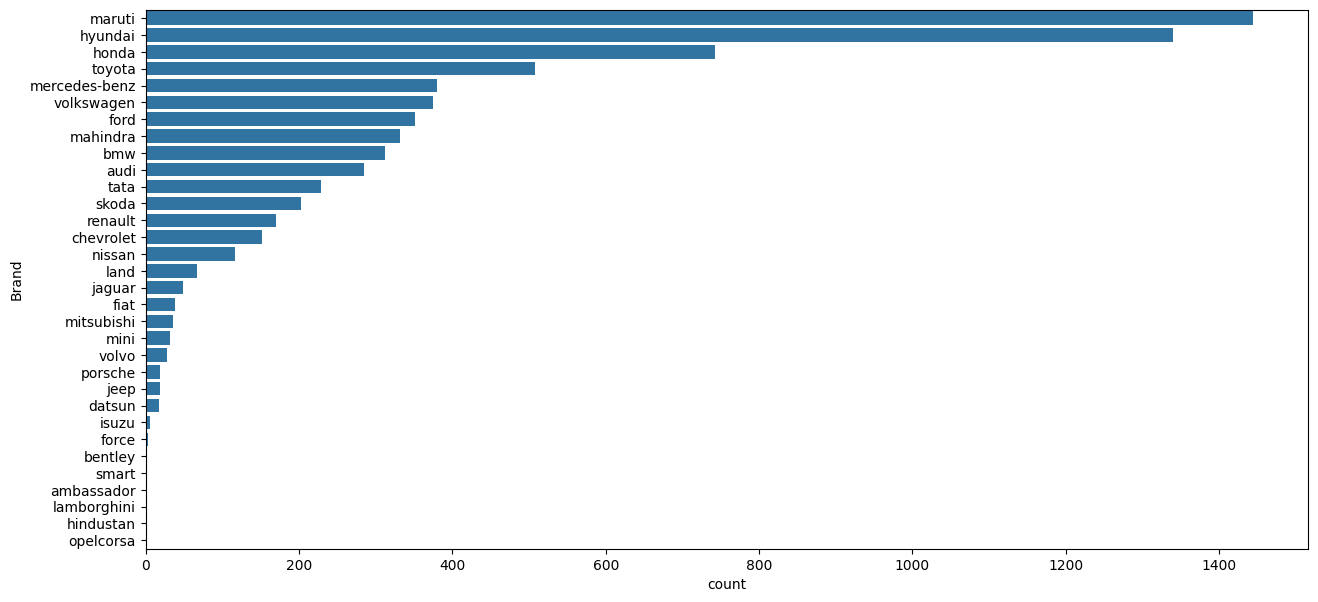

In [35]:
#let's vizualize the car brand names and their frequencies
plt.figure(figsize = (15, 7))

sns.countplot(y = "Brand", data = used_cars_df, order = used_cars_df["Brand"].value_counts().index)

**2. Car Model Name**

In [37]:
# Extract Model Names
used_cars_df["Model"] = used_cars_df["Name"].apply(lambda x: x.split(" ")[1].lower())

# Check the data
used_cars_df["Model"].value_counts()

Model
swift      418
city       318
i20        303
innova     203
verna      200
          ... 
fortwo       1
redi         1
e            1
mustang      1
1.4gsi       1
Name: count, Length: 218, dtype: int64

<Axes: xlabel='count', ylabel='Model'>

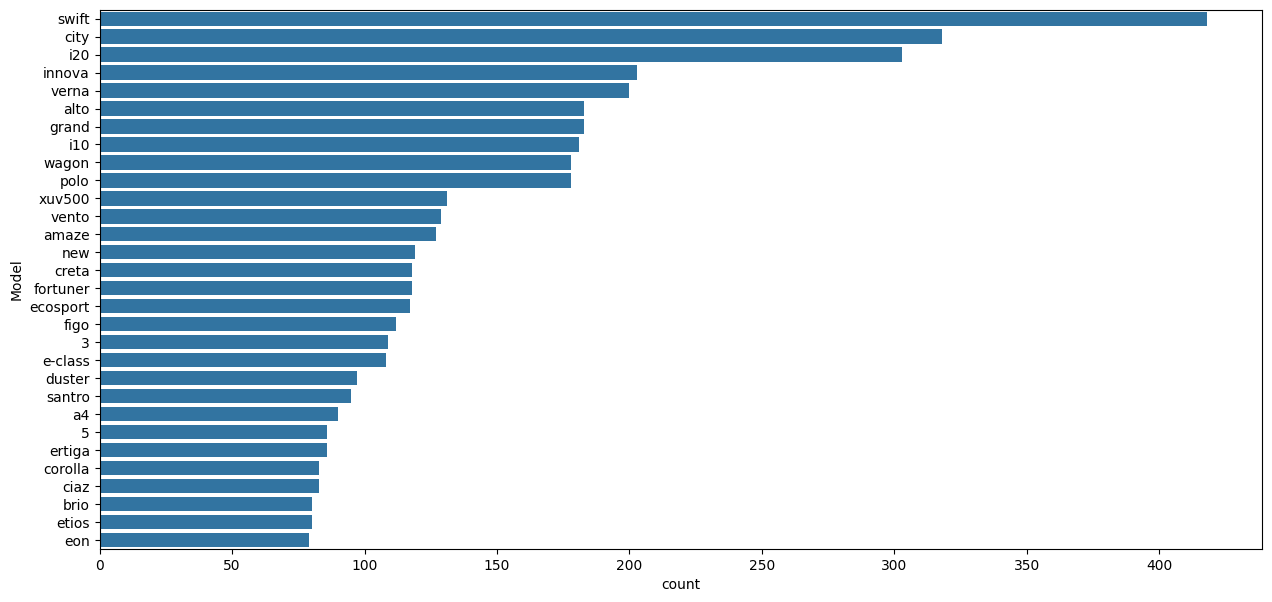

In [38]:
#let's visualize the car model
plt.figure(figsize = (15, 7))

sns.countplot(y = "Model", data = used_cars_df, order = used_cars_df["Model"].value_counts().index[0:30])

- From the above charts we observe that we have used cars from luxury as well as cheap brands.

**3. Car_category**

In [41]:
used_cars_df.groupby(["Brand"])["Price"].mean().sort_values(ascending = False)

Brand
lamborghini      120.000000
bentley           59.000000
porsche           48.348333
land              39.259500
jaguar            37.632250
mini              26.896923
mercedes-benz     26.809874
audi              25.537712
bmw               25.243146
volvo             18.802857
jeep              18.718667
isuzu             14.696667
toyota            11.580024
mitsubishi        11.058889
force              9.333333
mahindra           8.045919
skoda              7.559075
ford               6.889400
renault            5.799034
honda              5.411743
hyundai            5.343433
volkswagen         5.307270
nissan             4.738352
maruti             4.517267
tata               3.562849
fiat               3.269286
datsun             3.049231
chevrolet          3.044463
smart              3.000000
ambassador         1.350000
hindustan               NaN
opelcorsa               NaN
Name: Price, dtype: float64

-  The mean price of a used Lamborghini is 120 Lakhs(**12 million INR**) and that of cars from other luxury brands follow in descending order. We can see that there are some **missing values** in our data. 

## **Exploratory Data Analysis**

In [44]:
# Summary statistics - Numeric variables
used_cars_df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.000,3626.00,5439.0000,7252.00
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Seats,7200.0,5.279722,0.811660,0.00,5.000,5.00,5.0000,10.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00
km_per_unit_fuel,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
engine_num,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
power_num,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
new_price_num,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00


**Observations:**

1. S.No. has no interpretation.
2. Kilometers_Driven values have an incredibly high range. We will check a few of the extreme values to get a sense of the data.
3. Minimum and the maximum number of seats in the car also needs checking. On average a car seems to have 5 seats, which is right.
4. We have used cars being sold at less than a lakh rupees and as high as 160 lakh, as we saw for Lamborghini earlier. We might have to drop some of these outliers to build a robust model.
5. Min Mileage being 0 is also concerning, we'll have to check it.
6. Engine and Power mean and median values are not very different.
7. New price range seems right. We have both cheap Maruti cars and Lamborghinis in our stock. Mean being twice that of the median suggests that there are only a few very high range brands.

In [46]:
# Checking the extreme values in Kilometers_Driven 
used_cars_df.sort_values(by = ["Kilometers_Driven"], ascending = False).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
2328,2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,NaN,65.00,15.97,kmpl,2993.0,258.00,NaN,bmw,x5
340,340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.0,NaN,7.50,19.30,kmpl,1968.0,141.00,NaN,skoda,octavia
1860,1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.90,20.54,kmpl,1598.0,103.60,NaN,volkswagen,vento
358,358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,NaN,2.70,20.36,kmpl,1197.0,78.90,NaN,hyundai,i10
2823,2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96 kmpl,1968 CC,138.03 bhp,5.0,NaN,13.00,16.96,kmpl,1968.0,138.03,NaN,volkswagen,jetta
3092,3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.4 kmpl,1497 CC,117.3 bhp,5.0,NaN,5.00,17.40,kmpl,1497.0,117.30,NaN,honda,city
4491,4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.0,NaN,4.45,18.50,kmpl,1197.0,82.90,NaN,hyundai,i20
6921,6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,NaN,NaN,23.40,kmpl,1248.0,74.00,NaN,maruti,swift
3649,3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.0 kmpl,1405 CC,70 bhp,5.0,NaN,1.00,17.00,kmpl,1405.0,70.00,NaN,tata,indigo
1528,1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,8.0,NaN,4.00,12.80,kmpl,2494.0,102.00,NaN,toyota,innova


- It looks like the first row here is a data entry error. An additional 0 might have being added by mistake since the other entries for Chennai range in hundred thousands.

- The other observations that follow are also on a higher end. There is a good chance that these are outliers. We'll look at this further while doing the univariate analysis.

In [48]:
# Check Kilometers_Driven Extreme values
used_cars_df.sort_values(by = ["Kilometers_Driven"], ascending = True).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
1361,1361,Maruti Alto 800 2016-2019 VXI,Mumbai,2019,171,Petrol,Manual,First,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN,3.60,24.70,kmpl,796.0,47.30,NaN,maruti,alto
5606,5606,Maruti Wagon R ZXI AMT 1.2,Mumbai,2019,600,Petrol,Automatic,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,6.8 Lakh,6.25,21.50,kmpl,1197.0,81.80,6.80,maruti,wagon
1198,1198,Volkswagen Polo 1.0 MPI Trendline,Hyderabad,2019,1000,Petrol,Manual,First,18.78 kmpl,999 CC,75 bhp,5.0,6.74 Lakh,5.68,18.78,kmpl,999.0,75.00,6.74,volkswagen,polo
5941,5941,Renault KWID RXL,Pune,2018,1000,Petrol,Manual,First,25.17 kmpl,799 CC,53.3 bhp,5.0,4.45 Lakh,3.40,25.17,kmpl,799.0,53.30,4.45,renault,kwid
6201,6201,Maruti Alto LXI,Kolkata,2019,1000,Petrol,Manual,First,24.7 kmpl,796 CC,47.3 bhp,5.0,3.99 Lakh,NaN,24.70,kmpl,796.0,47.30,3.99,maruti,alto
1161,1161,Tata Tigor 1.2 Revotron XTA,Ahmedabad,2018,1000,Petrol,Automatic,First,20.3 kmpl,1199 CC,84 bhp,5.0,NaN,6.85,20.30,kmpl,1199.0,84.00,NaN,tata,tigor
1598,1598,Tata Xenon XT EX 4X2,Jaipur,2017,1000,Diesel,Manual,First,13.49 kmpl,2179 CC,138.03 bhp,5.0,NaN,7.50,13.49,kmpl,2179.0,138.03,NaN,tata,xenon
173,173,Hyundai Grand i10 1.2 Kappa Asta,Kolkata,2019,1000,Petrol,Manual,First,18.9 kmpl,1197 CC,81.86 bhp,5.0,7.39 Lakh,6.50,18.90,kmpl,1197.0,81.86,7.39,hyundai,grand
1242,1242,Jaguar XE 2.0L Diesel Prestige,Delhi,2018,1000,Diesel,Automatic,First,13.6 kmpl,1999 CC,177 bhp,5.0,52.77 Lakh,40.00,13.60,kmpl,1999.0,177.00,52.77,jaguar,xe
5339,5339,Hyundai i20 Active SX Dual Tone Petrol,Pune,2019,1000,Petrol,Manual,First,17.19 kmpl,1197 CC,81.86 bhp,5.0,10.25 Lakh,8.60,17.19,kmpl,1197.0,81.86,10.25,hyundai,i20


- After looking at the columns - Year, New Price, and Price entries seem feasible.
- 1000 might be the default value in this case. Quite a few cars having driven exactly 1000 km is suspicious.

In [50]:
# Check seats extreme values
used_cars_df.sort_values(by = ["Seats"], ascending = True).head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
3999,3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,NaN,18.00,10.5,kmpl,3197.0,NaN,NaN,audi,a4
693,693,Mercedes-Benz SLK-Class SLK 350,Coimbatore,2016,22732,Petrol,Automatic,First,18.1 kmpl,3498 CC,306 bhp,2.0,NaN,55.54,18.1,kmpl,3498.0,306.0,NaN,mercedes-benz,slk-class
798,798,Mercedes-Benz SLK-Class SLK 350,Bangalore,2015,10000,Petrol,Automatic,First,18.1 kmpl,3498 CC,306 bhp,2.0,NaN,55.00,18.1,kmpl,3498.0,306.0,NaN,mercedes-benz,slk-class
5781,5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.4 kmpl,5204 CC,560 bhp,2.0,NaN,120.00,6.4,kmpl,5204.0,560.0,NaN,lamborghini,gallardo
4722,4722,Mercedes-Benz SL-Class SL 500,Kolkata,2010,35000,Petrol,Automatic,First,8.1 kmpl,5461 CC,387.3 bhp,2.0,NaN,29.50,8.1,kmpl,5461.0,387.3,NaN,mercedes-benz,sl-class


- Audi A4 having 0 seats is a data entry error. This column requires some outlier treatment or we can treat seats == 0 as a missing value. Overall, there doesn't seem much to be concerned about here.  

In [52]:
# Let us check if we have a similar car in our dataset.
used_cars_df[used_cars_df["Name"].str.startswith("Audi A4")]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl,1968.0,140.80,NaN,audi,a4
50,50,Audi A4 2.0 TDI 177 Bhp Premium Plus,Kochi,2015,13648,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,21.43,17.11,kmpl,1968.0,174.33,NaN,audi,a4
65,65,Audi A4 2.0 TDI Multitronic,Jaipur,2012,65664,Diesel,Automatic,First,16.55 kmpl,1968 CC,140 bhp,5.0,NaN,13.50,16.55,kmpl,1968.0,140.00,NaN,audi,a4
103,103,Audi A4 3.0 TDI Quattro Premium,Kolkata,2010,30000,Diesel,Automatic,First,14.94 kmpl,2967 CC,241.4 bhp,5.0,NaN,9.80,14.94,kmpl,2967.0,241.40,NaN,audi,a4
150,150,Audi A4 2.0 TDI 177 Bhp Premium Plus,Coimbatore,2015,48214,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,23.32,17.11,kmpl,1968.0,174.33,NaN,audi,a4
717,717,Audi A4 2.0 TDI 177 Bhp Premium Plus,Bangalore,2013,45979,Diesel,Automatic,Second,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,19.50,17.11,kmpl,1968.0,174.33,NaN,audi,a4
853,853,Audi A4 2.0 TDI,Delhi,2011,46000,Diesel,Automatic,Second,16.55 kmpl,1968 CC,147.51 bhp,5.0,NaN,10.99,16.55,kmpl,1968.0,147.51,NaN,audi,a4
854,854,Audi A4 2.0 TDI,Kolkata,2012,47346,Diesel,Automatic,First,16.55 kmpl,1968 CC,147.51 bhp,5.0,NaN,14.50,16.55,kmpl,1968.0,147.51,NaN,audi,a4
874,874,Audi A4 2.0 TDI Multitronic,Ahmedabad,2011,59000,Diesel,Automatic,First,16.55 kmpl,1968 CC,140 bhp,5.0,NaN,12.50,16.55,kmpl,1968.0,140.00,NaN,audi,a4
964,964,Audi A4 2.0 TDI,Kolkata,2009,34000,Diesel,Automatic,First,16.55 kmpl,1968 CC,147.51 bhp,5.0,NaN,9.95,16.55,kmpl,1968.0,147.51,NaN,audi,a4


- Looks like an Audi A4 typically has 5 seats.

In [54]:
# Let us replace #seats in row index 3999 form 0 to 5
used_cars_df.loc[3999, "Seats"] = 5.0

In [55]:
# Check seats extreme values
used_cars_df.sort_values(by = ["Seats"], ascending = False).head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
2575,2575,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2015,120000,Diesel,Manual,First,14.8 kmpl,2499 CC,80 bhp,10.0,NaN,5.50,14.8,kmpl,2499.0,80.0,NaN,chevrolet,tavera
1907,1907,Toyota Qualis FS B3,Bangalore,2002,63000,Diesel,Manual,Third,13.1 kmpl,2446 CC,75 bhp,10.0,NaN,3.65,13.1,kmpl,2446.0,75.0,NaN,toyota,qualis
6288,6288,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2005,150000,Diesel,Manual,Second,14.8 kmpl,2499 CC,80 bhp,10.0,NaN,NaN,14.8,kmpl,2499.0,80.0,NaN,chevrolet,tavera
6242,6242,Tata Sumo EX 10/7 Str BSII,Chennai,2015,196000,Diesel,Manual,Second,12.2 kmpl,1948 CC,68 bhp,10.0,NaN,NaN,12.2,kmpl,1948.0,68.0,NaN,tata,sumo
814,814,Toyota Qualis FS B2,Pune,2004,77757,Diesel,Manual,Second,13.1 kmpl,2446 CC,75 bhp,10.0,NaN,3.50,13.1,kmpl,2446.0,75.0,NaN,toyota,qualis


- Of course, a Toyota Qualis has 10 seats and so does a Tata Sumo. We don't see any data entry error here.

In [57]:
# Check Mileage - km_per_unit_fuel extreme values
used_cars_df.sort_values(by = ["km_per_unit_fuel"], ascending = True).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
2597,2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,NaN,1.12,0.0,kmpl,1086.0,NaN,NaN,hyundai,santro
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0 kmpl,999 CC,null bhp,5.0,NaN,2.30,0.0,kmpl,999.0,NaN,NaN,hyundai,santro
5270,5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,NaN,1.85,0.0,kmpl,NaN,NaN,NaN,honda,city
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0 kmpl,1968 CC,null bhp,5.0,NaN,5.45,0.0,kmpl,1968.0,NaN,NaN,volkswagen,jetta
6857,6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,NaN,0.0,kmpl,2179.0,115.0,NaN,land,rover
443,443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,NaN,3.35,0.0,kmpl,1086.0,NaN,NaN,hyundai,santro
5119,5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0 kmpl,1086 CC,null bhp,5.0,NaN,1.17,0.0,kmpl,1086.0,NaN,NaN,hyundai,santro
5022,5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,26.00,0.0,kmpl,2179.0,115.0,NaN,land,rover
5016,5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,15.50,0.0,kmpl,2179.0,115.0,NaN,land,rover
2542,2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,NaN,3.15,0.0,kmpl,NaN,NaN,NaN,hyundai,santro


- We will have to treat Mileage = 0 as missing values.

In [59]:
# Check Mileage - km_per_unit_fuel extreme values
used_cars_df.sort_values(by = ["km_per_unit_fuel"], ascending = False).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
1332,1332,Maruti Wagon R CNG LXI,Pune,2013,79494,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,5.54 Lakh,2.96,33.54,km/kg,998.0,67.04,5.54,maruti,wagon
2059,2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,5.58 Lakh,3.05,33.54,km/kg,998.0,67.04,5.58,maruti,wagon
2371,2371,Maruti Wagon R CNG LXI,Pune,2014,29202,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,5.54 Lakh,3.90,33.54,km/kg,998.0,67.04,5.54,maruti,wagon
3129,3129,Maruti Wagon R CNG LXI,Delhi,2014,74663,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,5.35 Lakh,3.25,33.54,km/kg,998.0,67.04,5.35,maruti,wagon
4141,4141,Maruti Wagon R CNG LXI,Mumbai,2014,47200,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,5.58 Lakh,2.85,33.54,km/kg,998.0,67.04,5.58,maruti,wagon
3869,3869,Maruti Alto 800 2016-2019 CNG LXI,Delhi,2012,65537,CNG,Manual,Second,33.44 km/kg,796 CC,40.3 bhp,4.0,NaN,2.10,33.44,km/kg,796.0,40.30,NaN,maruti,alto
1269,1269,Maruti Alto 800 2016-2019 CNG LXI,Mumbai,2018,10600,CNG,Manual,First,33.44 km/kg,796 CC,40.3 bhp,4.0,NaN,3.50,33.44,km/kg,796.0,40.30,NaN,maruti,alto
3553,3553,Maruti Alto 800 2016-2019 CNG LXI,Pune,2015,18000,CNG,Manual,First,33.44 km/kg,796 CC,40.3 bhp,4.0,NaN,3.00,33.44,km/kg,796.0,40.30,NaN,maruti,alto
4769,4769,Maruti Alto 800 2016-2019 CNG LXI,Kochi,2017,24310,CNG,Manual,First,33.44 km/kg,796 CC,40.3 bhp,4.0,NaN,3.70,33.44,km/kg,796.0,40.30,NaN,maruti,alto
6019,6019,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,NaN,32.26,km/kg,998.0,58.20,NaN,maruti,alto


- Maruti Wagon R and Maruti Alto CNG versions are budget-friendly cars with high mileage, so these data points are fine.

In [61]:
# Looking at value counts for non-numeric features

num_to_display = 10 #displaying 10 values of each categorical variables

#selectig all columns of type objects
for colname in used_cars_df.dtypes[used_cars_df.dtypes == "object"].index:
    val_counts = used_cars_df[colname].value_counts(dropna = False)  # Will also show the NA counts
    
    print(val_counts[:num_to_display])
    
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("\n\n") #adding more space for lisibility

Name
Mahindra XUV500 W8 2WD        55
Maruti Swift VDI              49
Maruti Swift Dzire VDI        42
Honda City 1.5 S MT           39
Maruti Swift VDI BSIV         37
Maruti Ritz VDi               35
Toyota Fortuner 3.0 Diesel    35
Honda Amaze S i-Dtech         32
Hyundai Grand i10 Sportz      32
Honda City 1.5 V MT           32
Name: count, dtype: int64
Only displaying first 10 of 2041 values.



Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Name: count, dtype: int64
Only displaying first 10 of 11 values.



Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64



Transmission
Manual       5204
Automatic    2049
Name: count, dtype: int64



Owner_Type
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: count, dtype: int64



Mile

In [62]:
#checking for electric cars
used_cars_df.loc[used_cars_df["Fuel_Type"] == "Electric"]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00,NaN,NaN,72.0,41.0,13.58,mahindra,e
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75,NaN,NaN,1798.0,73.0,NaN,toyota,prius


- Mileage values for these cars are NaN, that is why we did not encounter these earlier with groupby.

- We can consider dropping these two observations if they turn out to be outliers later. There is a good chance that we will not be able to create a good price prediction model for electric cars, with the currently available data.

### **Missing Values**


In [65]:
# Checking missing values in the dataset
used_cars_df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
km_per_unit_fuel        2
mileage_unit            2
engine_num             46
power_num             175
new_price_num        6247
Brand                   0
Model                   0
dtype: int64

* 2 Electric car variants don't have entries for Mileage.
* Engine displacement information of 46 observations is missing and a maximum power of 175 entries is missing.
* Information about the number of seats is not available for 53 entries.
* New Price as we saw earlier has a huge missing count.
* Price is also missing for 1234 entries.
* New Price for 6247 entries is missing. We need to explore if we can impute these or if we should drop this column altogether.

In [67]:
# Drop the redundant columns.
used_cars_df.drop(
    columns=["Mileage", "mileage_unit", "Engine", "Power", "New_Price", "S.No."], inplace = True
)

### **Visualizations**

#### **Price**

<Axes: xlabel='Price', ylabel='Density'>

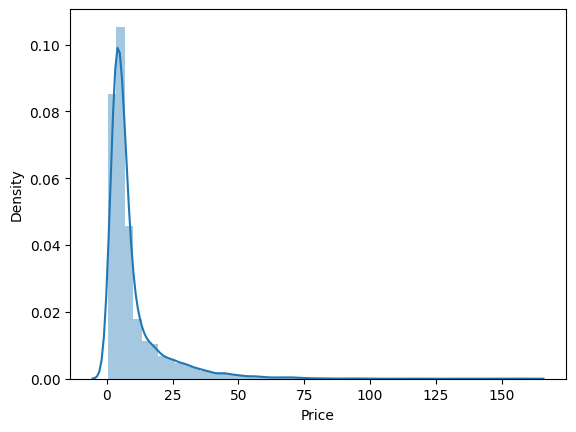

In [69]:
# Plotting the distribution of car prices to assess skewness and outliers
sns.distplot(used_cars_df["Price"])

- This is a highly skewed distribution. Let us use log transformation on this column to see if that helps normalize the distribution.

<Axes: xlabel='Log(Price)', ylabel='Density'>

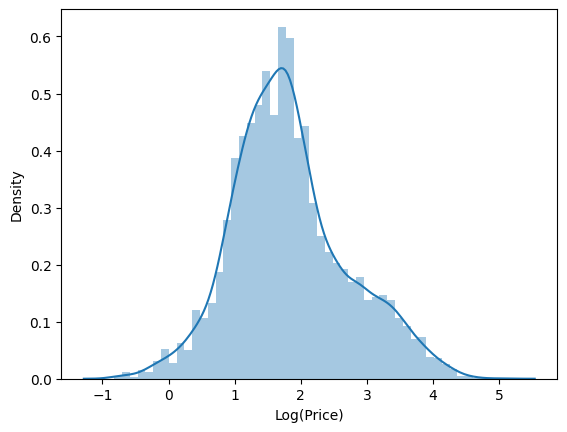

In [71]:
# Visualizing the distribution of log-transformed car prices to assess normalization and reduce skewness
sns.distplot(np.log(used_cars_df["Price"]), axlabel = "Log(Price)")

- Log transformation can help in transforming skewed data to conform more closely to a normal distribution. This is particularly important in tools like linear regression, where normality of residuals is an assumption.


In [73]:
# Creating a new column with the transformed variable.
used_cars_df["price_log"] = np.log(used_cars_df["Price"])

#### **Price vs Location**

<Axes: xlabel='Location', ylabel='Price'>

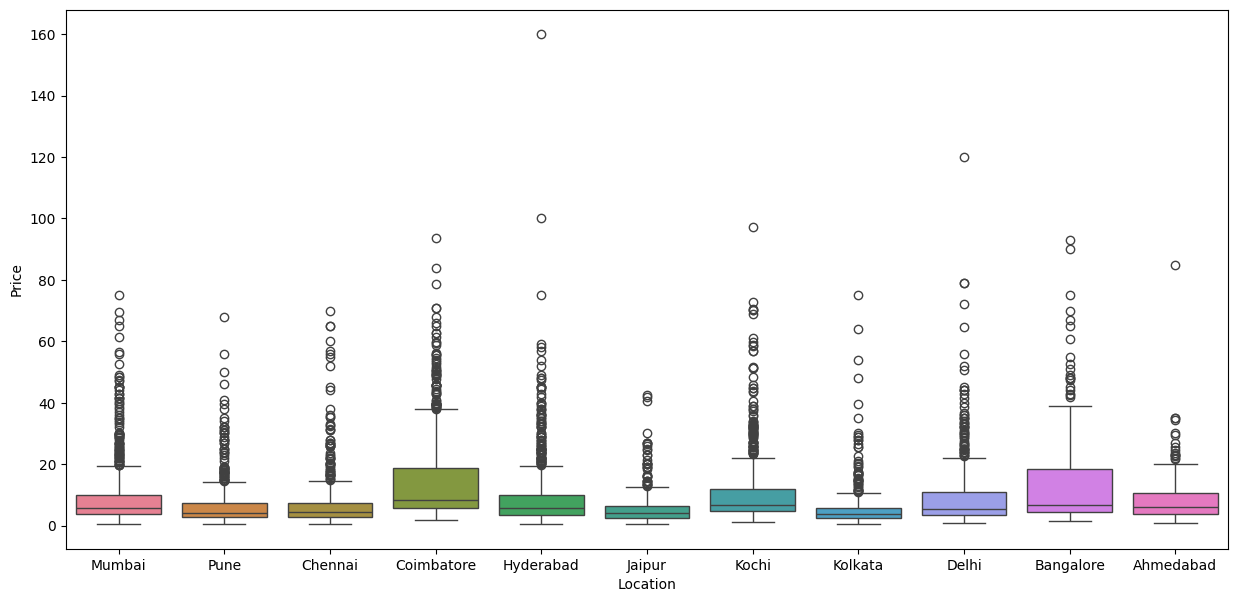

In [75]:
# Creating a boxplot to visualize the distribution of car prices across different locations
plt.figure(figsize = (15, 7))

sns.boxplot(x = "Location", y = "Price",hue='Location', data = used_cars_df)

- Price of used cars has a large IQR in Coimbatore and Bangalore

#### **Kilometers_Driven**

<Axes: xlabel='Kilometers_Driven', ylabel='Density'>

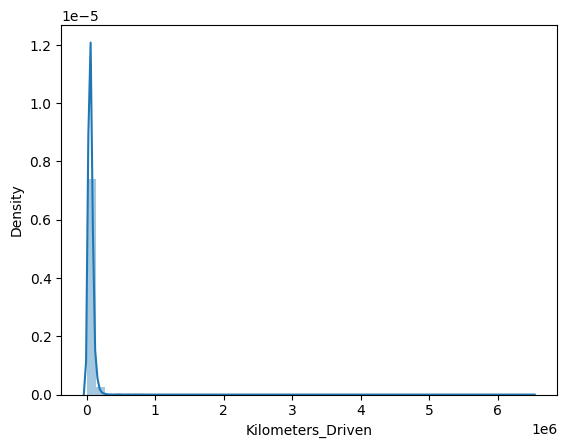

In [78]:
# Visualizing the distribution of kilometers driven by cars to identify skewness and outliers
sns.distplot(used_cars_df["Kilometers_Driven"])

<Axes: xlabel='Log(Kilometers_Driven)', ylabel='Density'>

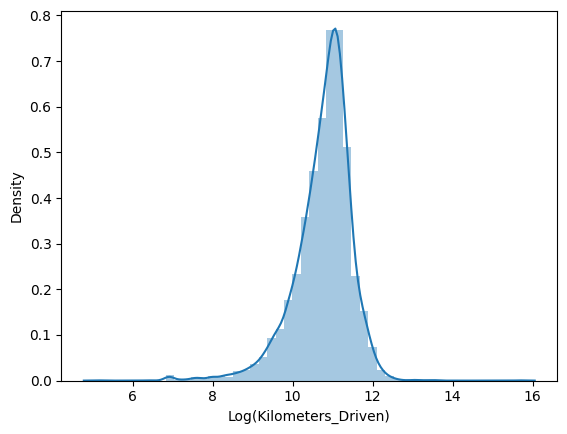

In [79]:
# Log transformation for kilometers_driven
sns.distplot(np.log(used_cars_df["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)")

- Transformation has reduced the extreme skewness.

In [81]:
# Applying log transformation to 'Kilometers_Driven' to reduce skewness and improve model fit
used_cars_df["kilometers_driven_log"] = np.log(used_cars_df["Kilometers_Driven"])

#### **Owner Type**

<Axes: xlabel='Owner_Type', ylabel='count'>

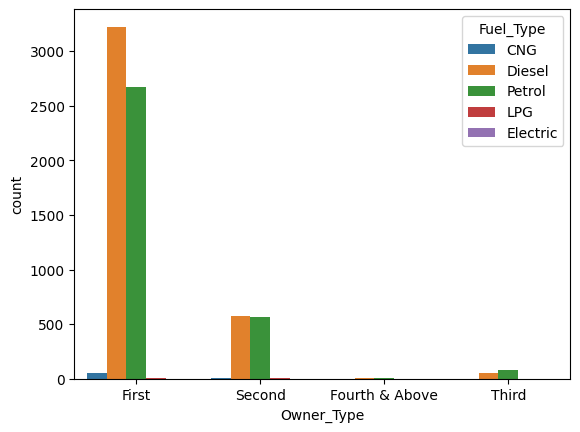

In [83]:
# Creating a count plot to visualize the distribution of car ownership types by different fuel types
sns.countplot(x='Owner_Type',hue='Fuel_Type',data=used_cars_df)

- Most of the cars have first owners.

#### **Fuel Type**

<Axes: xlabel='Fuel_Type', ylabel='count'>

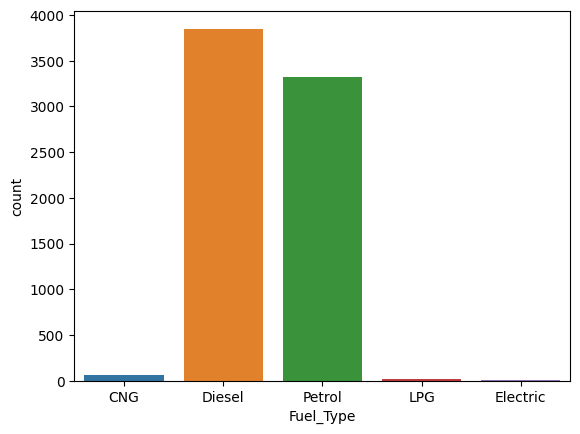

In [86]:
# Creating a count plot to visualize the distribution of fuel types, though using the same variable for both 'x' and 'hue' may be redundant
sns.countplot(x='Fuel_Type', hue='Fuel_Type',data=used_cars_df)

- About 99% of the cars run on Diesel and Petrol

#### **Transmission**

<Axes: xlabel='Transmission', ylabel='count'>

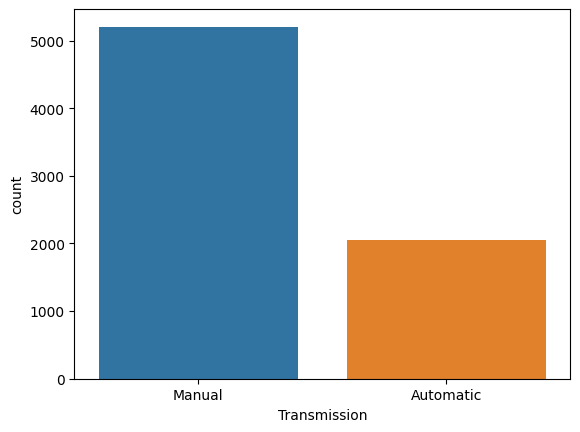

In [89]:
# Creating a count plot to visualize the distribution of transmission types. Note: Using 'Transmission' for both 'x' and 'hue' is redundant and does not add analytical value.
sns.countplot(x='Transmission', hue='Transmission',data=used_cars_df)

- Most cars have a Manual Transmission

#### **Year**

<Axes: xlabel='Year', ylabel='count'>

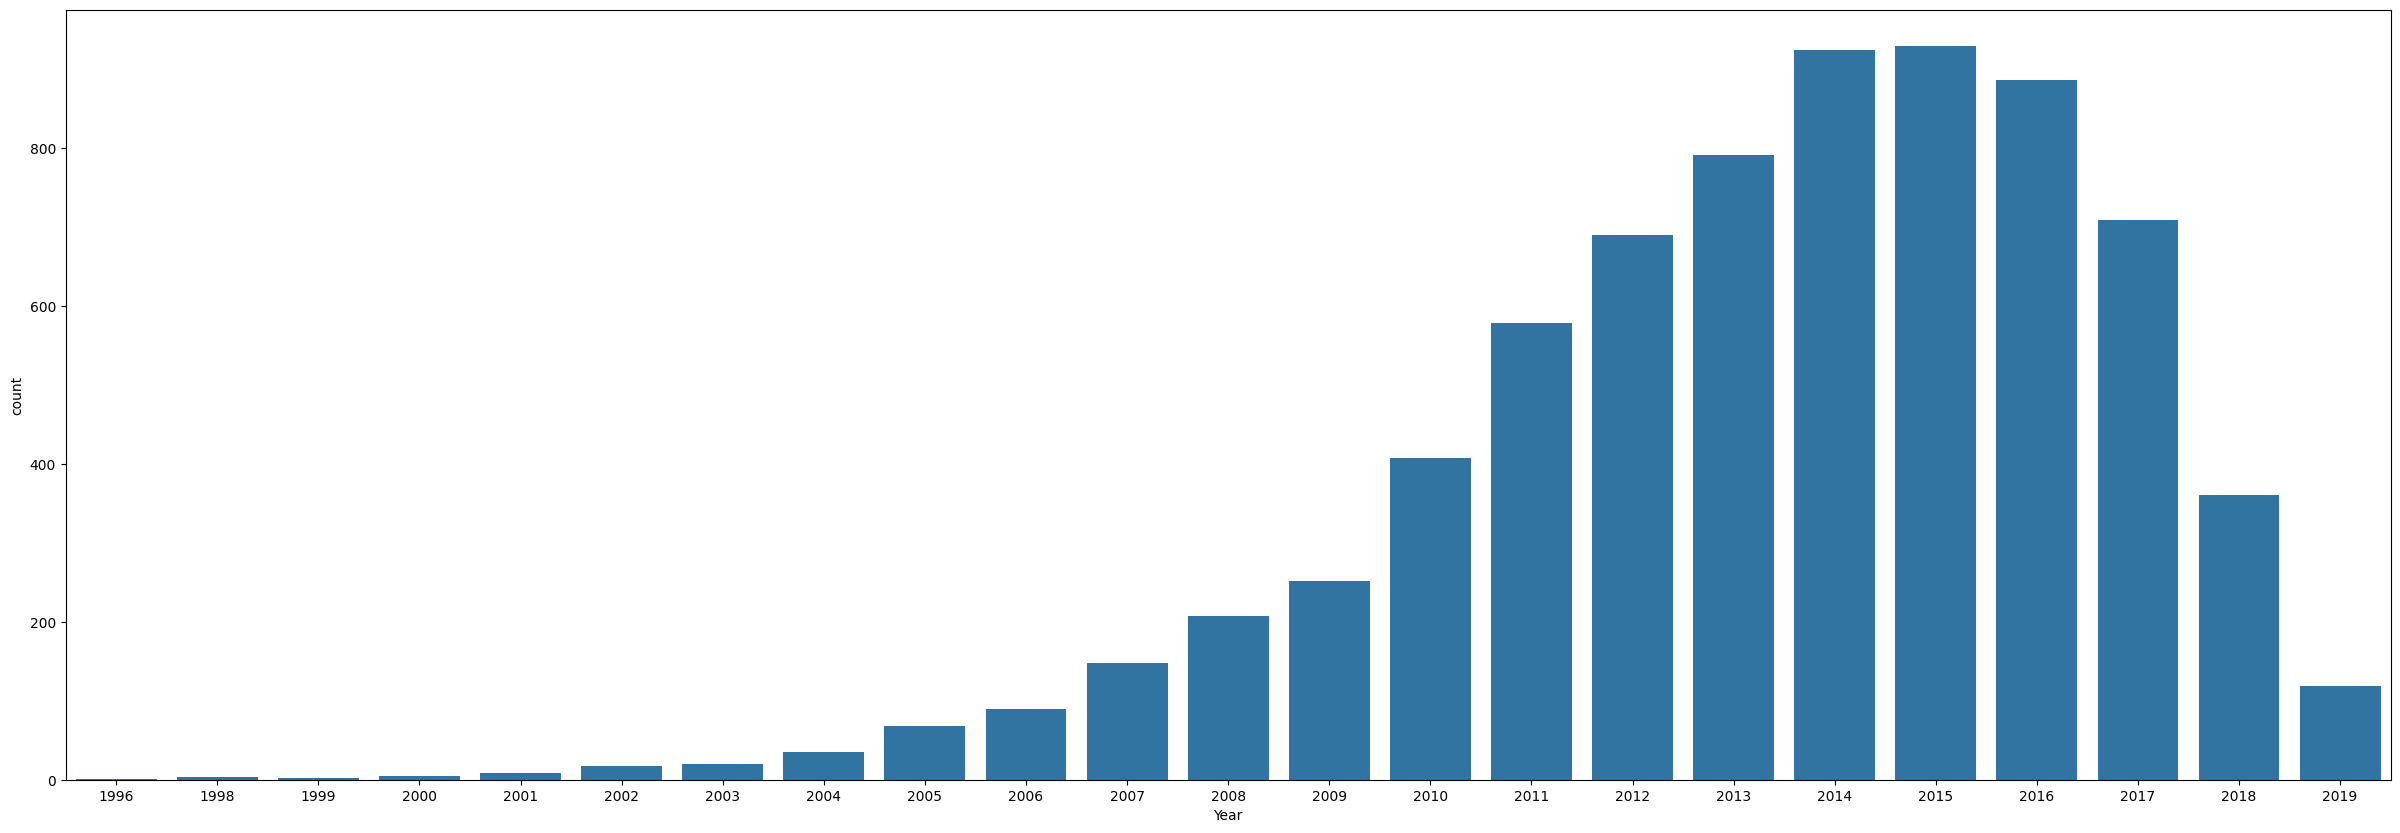

In [92]:
# Setting up a large figure to visualize the frequency of cars by year of manufacture in the dataset
plt.figure(figsize=(30,10))
sns.countplot(x='Year',data=used_cars_df)

- Most of the cars were manufactured  between 2014 and 2016

### **Bivariate Distributions**

<Axes: xlabel='Year', ylabel='Price'>

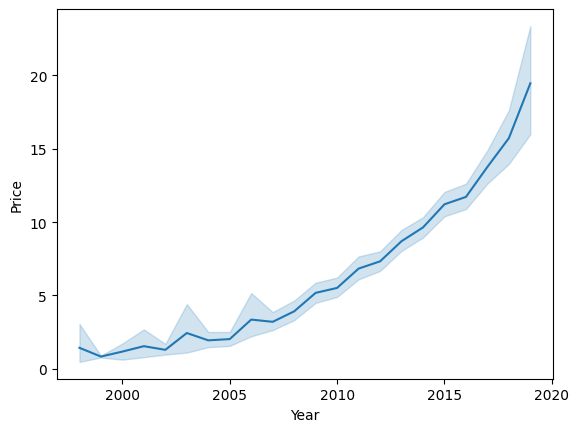

In [95]:
#Visualizing the relationship between car Prices and Year of manufacture
sns.lineplot(x='Year',y='Price',data=used_cars_df)

- The Prices of the car increases as years go by

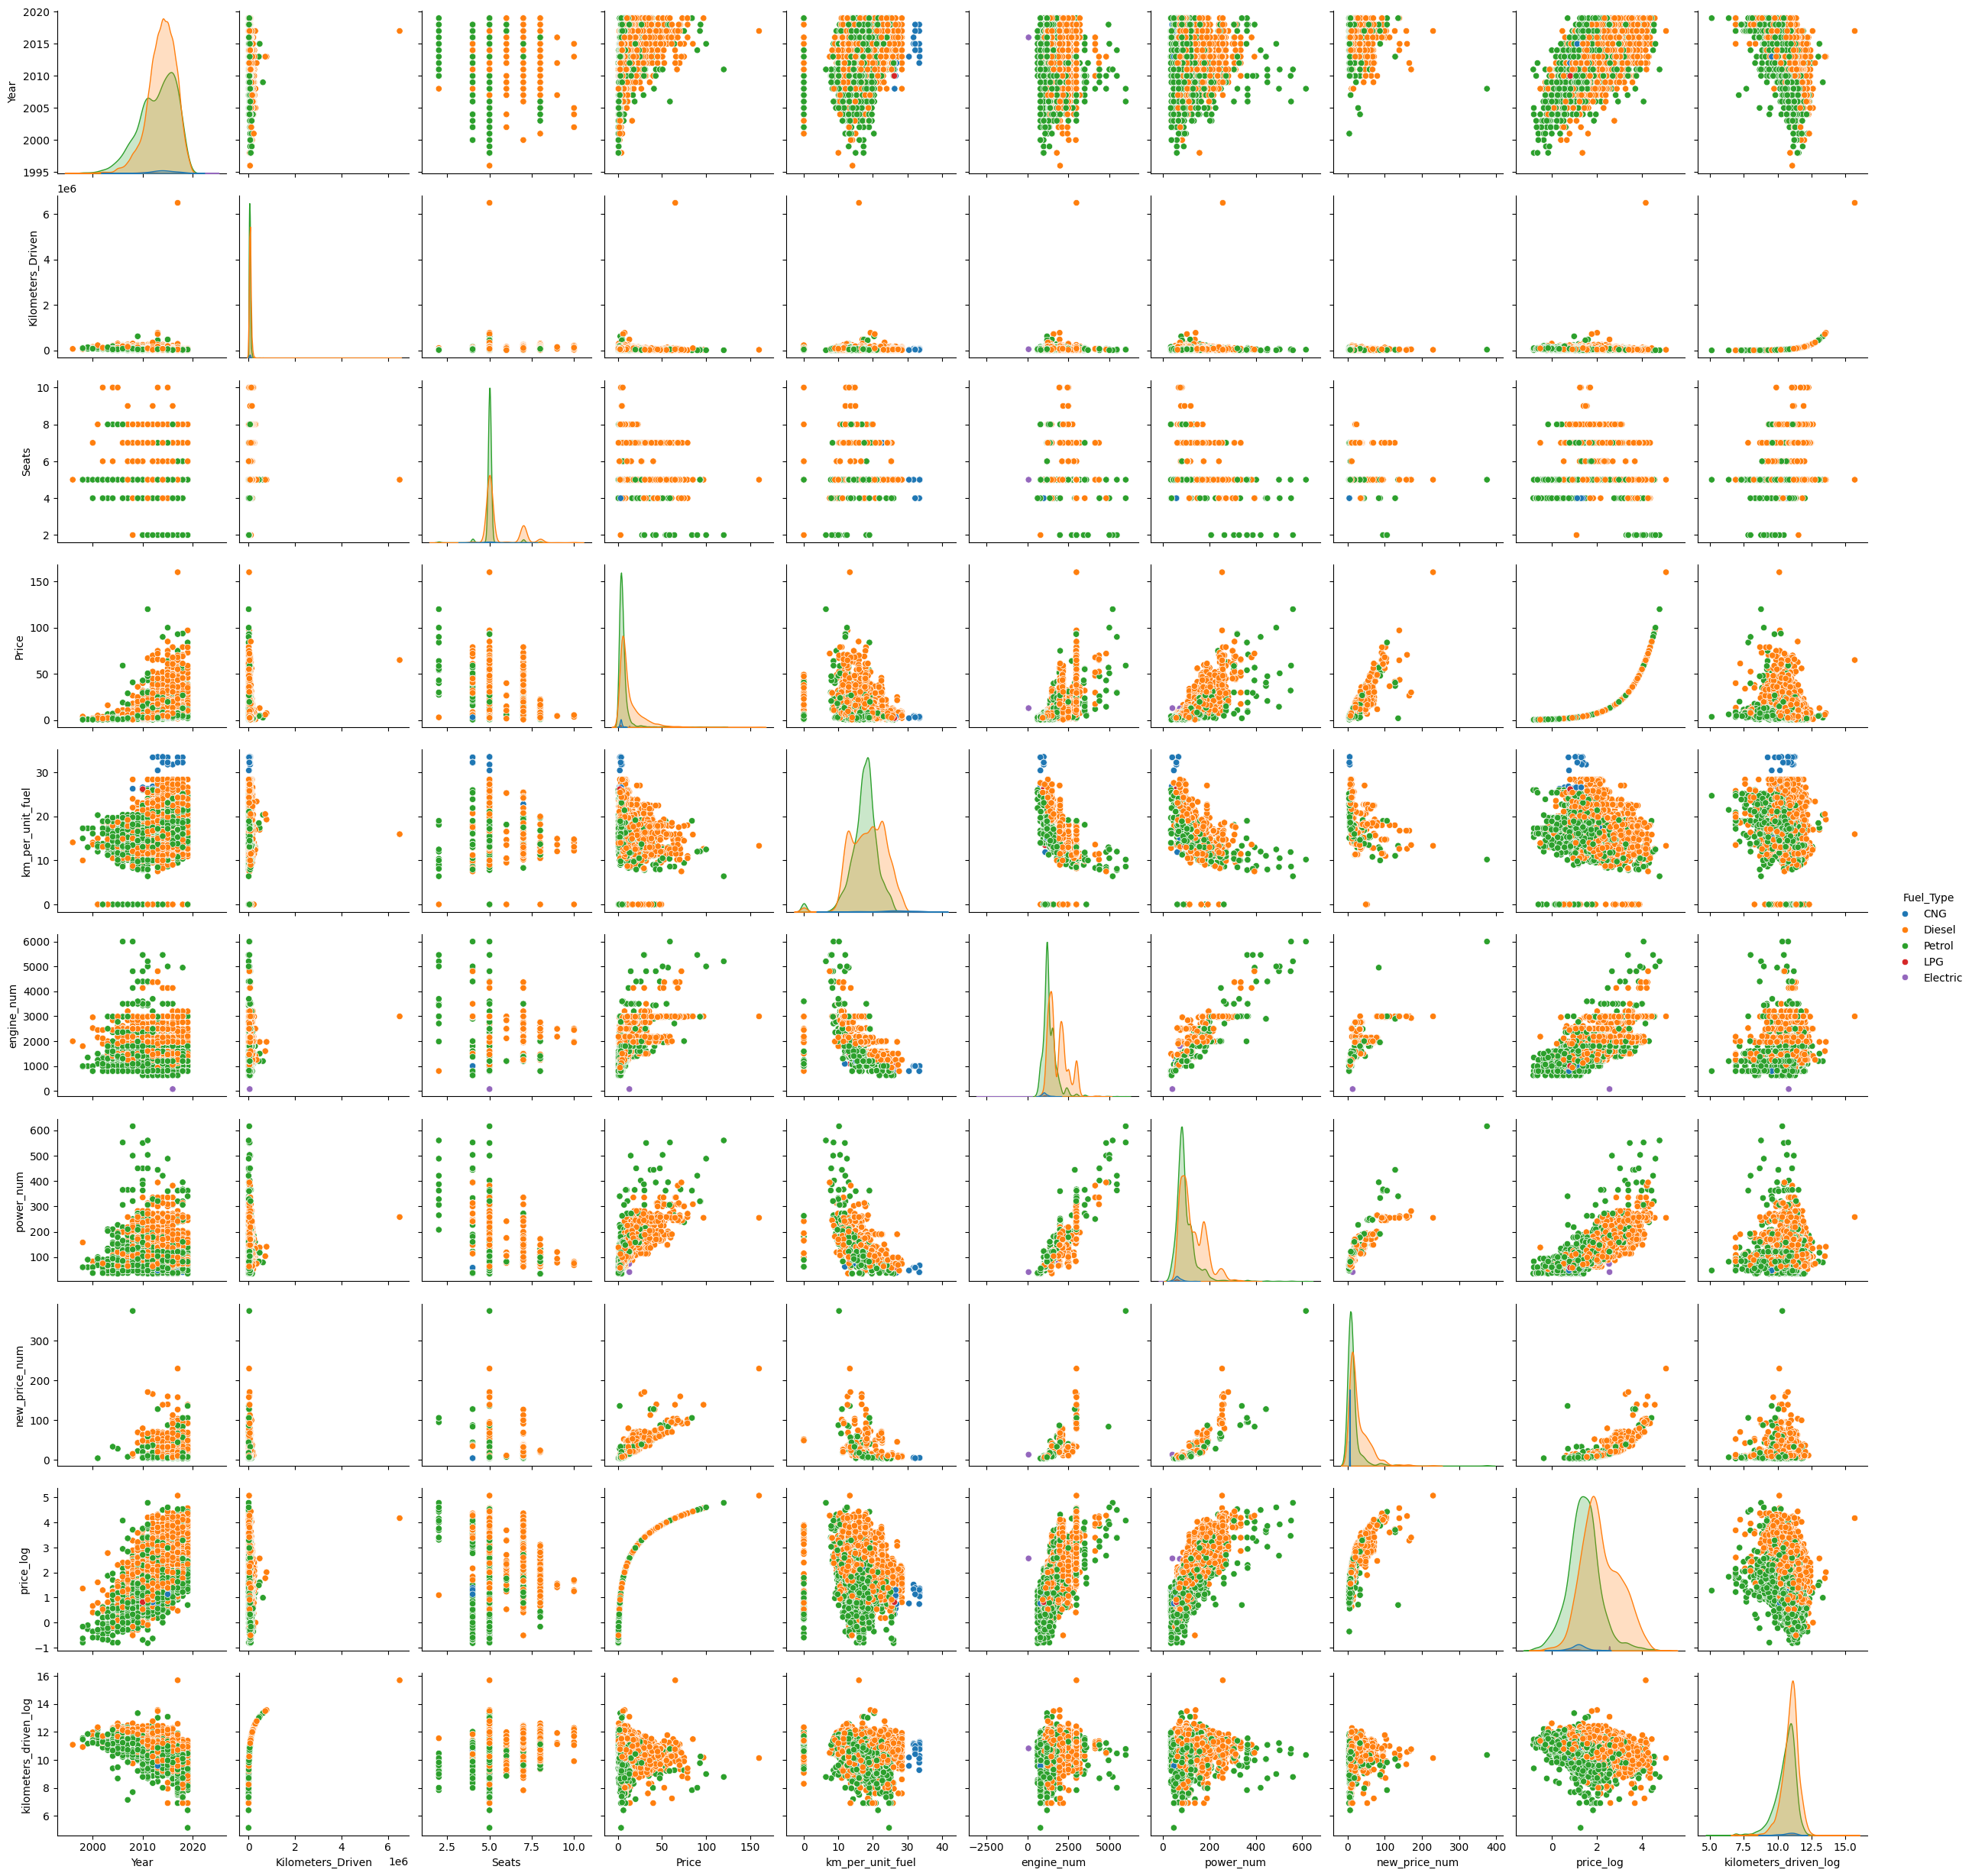

In [97]:
# Generating a pair plot to visualize relationships between numerical variables across different fuel types
sns.pairplot(used_cars_df, hue = "Fuel_Type")

We can get a lot of information by zooming in on these charts.

* Kilometers Driven does not appear to be related to price, contrary to popular belief.
* Price seem to have a positive relationship with Year. The more recent the car, the higher the price.
* Mileage (km_per_unit_fuel) does not seem to show much relationship with the price of used cars.
* Engine displacement and Power of the car seem to have a positive relationship with the price.
* New Price and Used Car Price appear to be positively correlated.
* Kilometers Driven has a peculiar relationship with the Year variable. Generally, the newer the car lesser the distance it has traveled, but this is not always true.

### **Correlation between numeric Variables**

<Axes: >

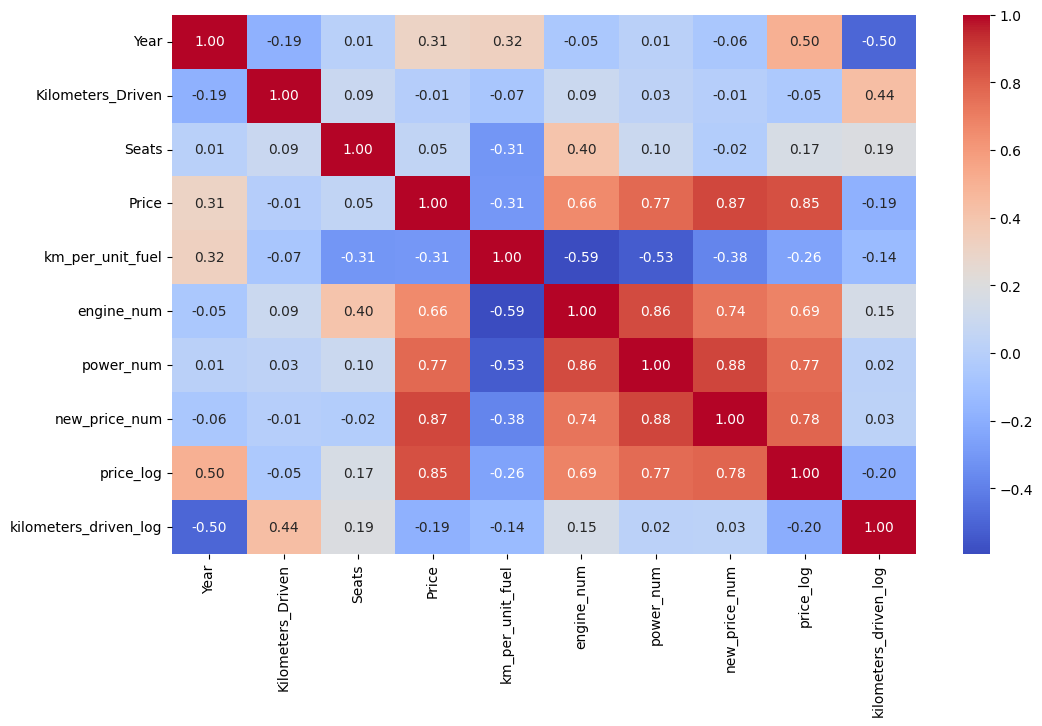

In [100]:
# Setting up a heatmap to visualize the correlation matrix of numeric variables in the dataset
plt.figure(figsize = (12, 7))
numeric_df = used_cars_df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot = True, fmt=".2f",cmap = "coolwarm")

* From his heatmap, we note that power_num, new_price_num and engine_num are important predictors of price

### **Missing Value Treatment**

In [103]:
# Checking missing values again
used_cars_df.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                      53
Price                    1234
km_per_unit_fuel            2
engine_num                 46
power_num                 175
new_price_num            6247
Brand                       0
Model                       0
price_log                1234
kilometers_driven_log       0
dtype: int64

#### **Seats**

In [105]:
# Filtering to display rows where the 'Seats' column has missing values
used_cars_df[used_cars_df["Seats"].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,km_per_unit_fuel,engine_num,power_num,new_price_num,Brand,Model,price_log,kilometers_driven_log
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,NaN,2.95,0.00,NaN,NaN,NaN,honda,city,1.081805,11.002200
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,NaN,2.11,16.10,NaN,NaN,NaN,maruti,swift,0.746688,10.645449
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,NaN,3.60,0.00,1498.0,99.0,NaN,ford,figo,1.280934,11.162460
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,NaN,1.75,16.10,NaN,NaN,NaN,maruti,swift,0.559616,11.490680
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,NaN,26.50,0.00,NaN,NaN,NaN,land,rover,3.277145,10.915107
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,NaN,3.20,12.80,NaN,NaN,NaN,honda,city,1.163151,10.915179
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,NaN,5.80,16.10,NaN,NaN,NaN,maruti,swift,1.757858,10.825661
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,NaN,1.50,0.00,NaN,NaN,NaN,honda,city,0.405465,11.652687
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,NaN,40.88,0.00,NaN,NaN,NaN,land,rover,3.710641,11.142992
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,NaN,1.70,13.00,1493.0,100.0,NaN,honda,city,0.530628,11.385092


We'll impute these missing values one by one, by taking **median number of seats** for the particular car, using the **Brand** and **Model name**. According to our research on car market, vehicles with 5 seats are quite common, making this value not only statistically significant but also practically relevant. 

In [107]:
## Calculating the median number of seats for each car brand and model combination
used_cars_df.groupby(["Brand", "Model"], as_index = False)["Seats"].median()

,Brand,Model,Seats
0,ambassador,classic,5.0
1,audi,a3,5.0
2,audi,a4,5.0
3,audi,a6,5.0
4,audi,a7,5.0
...,...,...,...
217,volvo,s60,5.0
218,volvo,s80,5.0
219,volvo,v40,5.0
220,volvo,xc60,5.0


In [108]:
# Impute missing Seats
used_cars_df["Seats"] = used_cars_df.groupby(["Brand", "Model"])["Seats"].transform(lambda x: x.fillna(x.median()))

In [109]:
# Check missing values in 'Seats'
used_cars_df[used_cars_df["Seats"].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,km_per_unit_fuel,engine_num,power_num,new_price_num,Brand,Model,price_log,kilometers_driven_log
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,NaN,1.50,19.5,1061.0,NaN,NaN,maruti,estilo,0.405465,10.933107
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,NaN,2.50,19.5,1061.0,NaN,NaN,maruti,estilo,0.916291,10.596635
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,NaN,1.75,19.5,1061.0,NaN,NaN,maruti,estilo,0.559616,10.839581


In [110]:
# Maruti Estilo can accomodate 5
used_cars_df["Seats"] = used_cars_df["Seats"].fillna(5.0)

In [111]:
# We will use similar methods to fill missing values for engine, power and new price
used_cars_df["engine_num"] = used_cars_df.groupby(["Brand", "Model"])["engine_num"].transform(
    lambda x: x.fillna(x.median())
)
used_cars_df["power_num"] = used_cars_df.groupby(["Brand", "Model"])["power_num"].transform(
    lambda x: x.fillna(x.median())
)
used_cars_df["new_price_num"] = used_cars_df.groupby(["Brand", "Model"])["new_price_num"].transform(
    lambda x: x.fillna(x.median())
)

In [112]:
# Checking for the number of missing values in each column of the DataFrame
used_cars_df.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       0
Price                    1234
km_per_unit_fuel            2
engine_num                  0
power_num                  12
new_price_num            1512
Brand                       0
Model                       0
price_log                1234
kilometers_driven_log       0
dtype: int64

- There are still some NAs in power and new_price_num. 
- There are a few car brands and models in our dataset that do not contain the new price information at all.

Now we'll have to estimate the new price using the other features. **KNN imputation** is one of the imputation methods that can be used for this. This sklearn method requires us to encode categorical variables if we are using them for imputation. In this case, we'll use only selected numeric features for imputation.

In [114]:
# Importing the KNNImputer class from sklearn for missing value imputation
from sklearn.impute import KNNImputer

# Initializing the KNNImputer with 3 nearest neighbors and uniform weights
imputer = KNNImputer(n_neighbors=3, weights="uniform")

# List of columns selected for KNN imputation
temp_used_cars_df_for_imputation = [
    "engine_num",
    "power_num",
    "Year",
    "km_per_unit_fuel",
    "new_price_num",
    "Seats",
]

# Applying the imputer to the selected columns in the DataFrame
temp_used_cars_df_for_imputation = imputer.fit_transform(used_cars_df[temp_used_cars_df_for_imputation])

# Converting the array returned by KNNImputer back to a DataFrame with appropriate column names
temp_used_cars_df_for_imputation = pd.DataFrame(
    temp_used_cars_df_for_imputation,
    columns=[
        "engine_num",
        "power_num",
        "Year",
        "km_per_unit_fuel",
        "new_price_num",
        "Seats",
    ],
)

# Add imputed columns to the original dataset
used_cars_df["new_price_num"] = temp_used_cars_df_for_imputation["new_price_num"]
used_cars_df["power_num"] = temp_used_cars_df_for_imputation["power_num"]
used_cars_df["km_per_unit_fuel"] = temp_used_cars_df_for_imputation["km_per_unit_fuel"]

In [115]:
#re-checking the number of missing values after imputation
used_cars_df.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       0
Price                    1234
km_per_unit_fuel            0
engine_num                  0
power_num                   0
new_price_num               0
Brand                       0
Model                       0
price_log                1234
kilometers_driven_log       0
dtype: int64

In [116]:
# Drop the redundant columns.
used_cars_df.drop(columns = ["Kilometers_Driven", "Name"], inplace = True)

# Drop the rows where 'Price' == NaN and proceed to modelling
used_cars_df = used_cars_df[used_cars_df["Price"].notna()]

-------------------
### **Model Building**
------------------
1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. Build Regression model using statsmodels library.
4. Evaluate the model performance.

-----------------
### **Performance Measures** :
-----------------
R-squared and RMSE can be used as a measure of success.

R-squared: This will tell us how much variation our predictive model can explain the data.

RMSE: This will give us a measure of how far off the model is predicting the original values on average.



#### **Define dependent variable**

In [119]:
#separating dependent variable and independent variables
ind_vars = used_cars_df.drop(["Price", "price_log"], axis = 1)
dep_var = used_cars_df["price_log"]

#### **Creating dummy variables**

In [121]:

# Function to encode categorical variables and convert True/False to 1/0
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    # Convert boolean True/False to integer 1/0
    x = x.astype(int)
    return x

ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()


,Year,Seats,km_per_unit_fuel,engine_num,power_num,new_price_num,kilometers_driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_land,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Model_1000,Model_3,Model_5,Model_6,Model_7,Model_800,Model_a,Model_a-star,Model_a3,Model_a4,Model_a6,Model_a7,Model_a8,Model_accent,Model_accord,Model_alto,Model_amaze,Model_ameo,Model_aspire,Model_aveo,Model_avventura,Model_b,Model_baleno,Model_beat,Model_beetle,Model_bolero,Model_bolt,Model_boxster,Model_br-v,Model_brio,Model_brv,Model_c-class,Model_camry,Model_captiva,Model_captur,Model_cayenne,Model_cayman,Model_cedia,Model_celerio,Model_ciaz,Model_city,Model_civic,Model_cla,Model_classic,Model_cls-class,Model_clubman,Model_compass,Model_continental,Model_cooper,Model_corolla,Model_countryman,Model_cr-v,Model_creta,Model_crosspolo,Model_cruze,Model_d-max,Model_duster,Model_dzire,Model_e,Model_e-class,Model_ecosport,Model_eeco,Model_elantra,Model_elite,Model_endeavour,Model_enjoy,Model_eon,Model_ertiga,Model_esteem,Model_estilo,Model_etios,Model_evalia,Model_f,Model_fabia,Model_fiesta,Model_figo,Model_fluence,Model_fortuner,Model_fortwo,Model_freestyle,Model_fusion,Model_gallardo,Model_getz,Model_gl-class,Model_gla,Model_glc,Model_gle,Model_gls,Model_go,Model_grand,Model_grande,Model_hexa,Model_i10,Model_i20,Model_ignis,Model_ikon,Model_indica,Model_indigo,Model_innova,Model_jazz,Model_jeep,Model_jetta,Model_koleos,Model_kuv,Model_kwid,Model_lancer,Model_laura,Model_linea,Model_lodgy,Model_logan,Model_m-class,Model_manza,Model_micra,Model_mobilio,Model_montero,Model_mustang,Model_mux,Model_nano,Model_new,Model_nexon,Model_nuvosport,Model_octavia,Model_omni,Model_one,Model_optra,Model_outlander,Model_pajero,Model_panamera,Model_passat,Model_petra,Model_platinum,Model_polo,Model_prius,Model_pulse,Model_punto,Model_q3,Model_q5,Model_q7,Model_qualis,Model_quanto,Model_r-class,Model_rapid,Model_redi,Model_redi-go,Model_renault,Model_ritz,Model_rover,Model_rs5,Model_s,Model_s-class,Model_s-cross,Model_s60,Model_s80,Model_safari,Model_sail,Model_santa,Model_santro,Model_scala,Model_scorpio,Model_siena,Model_sl-class,Model_slc,Model_slk-class,Model_sonata,Model_spark,Model_ssangyong,Model_sumo,Model_sunny,Model_superb,Model_swift,Model_sx4,Model_tavera,Model_teana,Model_terrano,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest
0,2010,5,26,998,58,5,11,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,5,19,1582,126,16,10,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### **Fitting a linear model Using Ordinary Least Squares Method**


In [123]:

#creating the ols object
ols_Object = ols("price_log ~ " + " + ".join(used_cars_df.columns.difference(["Price", "price_log"])), data=used_cars_df)
ols_Object

In [124]:
# Fit the model
olsModel=ols_Object.fit()
# Get the summary of the model
print(olsModel.summary())


                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     592.9
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:02:34   Log-Likelihood:                 2006.7
No. Observations:                6019   AIC:                            -3535.
Df Residuals:                    5780   BIC:                            -1933.
Df Model:                         238                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [125]:
# Retrieving the coefficients of the OLS regression model
olsModel.params

Intercept               -208.643308
Brand[T.audi]             -5.382257
Brand[T.bentley]          -2.645781
Brand[T.bmw]              -6.207899
Brand[T.chevrolet]        -6.551969
                            ...    
engine_num                -0.000080
kilometers_driven_log     -0.068338
km_per_unit_fuel          -0.000692
new_price_num              0.002433
power_num                  0.002878
Length: 265, dtype: float64

In [126]:
# Retrieving the residuals of the OLS regression model
olsModel.resid

0      -0.143550
1       0.243756
2       0.246557
3       0.073744
4       0.034146
          ...   
6014    0.009416
6015   -0.066024
6016   -0.187403
6017    0.090241
6018    0.014707
Length: 6019, dtype: float64

* Both the R-squared and Adjusted R squared of our model are very high. This is a clear indication that we have been able to create a very good model that can explain the variance in the price of used cars for up to 96%.
* To be able to make statistical inferences from our model, we will have to test that the linear regression assumptions are followed.


### **Checking Performance Metrics**

In [129]:
# Get the predicted values
predictions =olsModel.predict(used_cars_df)

# Calculate MSE
mse = mean_squared_error(used_cars_df["price_log"], predictions)

# Calculate MAE
mae = mean_absolute_error(used_cars_df["price_log"], predictions)

# Calculate RMSE
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 0.030057306756319426
Mean Absolute Error (MAE): 0.12331928981870356
Root Mean Squared Error (RMSE): 0.17337043218588177


* The units of both RMSE and MAE are the same - Lakhs in this case. But RMSE is greater than MAE because it penalizes the outliers more.


**Checking the Linear Regression Assumptions**

1. No Multicollinearity
2. Mean of residuals should be 0
3. No Heteroscedasticity
4. Linearity of variables
5. Normality of error terms

#### **Checking Assumption 1: No Multicollinearity**

- We will use Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

- Features having a VIF score >10 will be dropped/treated till all the features have a VIF score <10.

In [133]:
# Extracting the names of all numeric columns from the DataFrame
numeric_cols=used_cars_df.select_dtypes(include=[np.number]).columns
numeric_cols

Index(['Year', 'Seats', 'Price', 'km_per_unit_fuel', 'engine_num', 'power_num',
       'new_price_num', 'price_log', 'kilometers_driven_log'],
      dtype='object')

In [134]:
# Calculating the correlation matrix for numeric columns in the DataFrame
used_cars_df[numeric_cols].corr()

,Year,Seats,Price,km_per_unit_fuel,engine_num,power_num,new_price_num,price_log,kilometers_driven_log
Year,1.000000,0.014652,0.305327,0.321712,-0.049053,0.032517,-0.016379,0.504969,-0.498021
Seats,0.014652,1.000000,0.053676,-0.302769,0.397851,0.100066,0.044705,0.166062,0.192145
Price,0.305327,0.053676,1.000000,-0.306536,0.658959,0.773559,0.774655,0.850189,-0.185937
km_per_unit_fuel,0.321712,-0.302769,-0.306536,1.000000,-0.585498,-0.489696,-0.445636,-0.255027,-0.134016
engine_num,-0.049053,0.397851,0.658959,-0.585498,1.000000,0.866409,0.754607,0.687325,0.147858
power_num,0.032517,0.100066,0.773559,-0.489696,0.866409,1.000000,0.865093,0.768059,0.008327
new_price_num,-0.016379,0.044705,0.774655,-0.445636,0.754607,0.865093,1.000000,0.713104,0.024096
price_log,0.504969,0.166062,0.850189,-0.255027,0.687325,0.768059,0.713104,1.000000,-0.204300
kilometers_driven_log,-0.498021,0.192145,-0.185937,-0.134016,0.147858,0.008327,0.024096,-0.204300,1.000000


- The correlation matrix provides valuable insights into the relationships between various features and the car price. **Key predictors of car price appear to be the power, engine size, and new price, along with the year of manufacture**. Understanding these correlations helps in building a more accurate predictive model for car pricing. The negative correlation between Price and kilometers driven suggests that cars with more kilometers driven tend to be older and have lower prices, which aligns with expectations.

In [136]:
# Accessing the matrix of exogenous variables used in the OLS model
ols_Object.exog

array([[  1.  ,   0.  ,   0.  , ...,  26.6 ,   5.51,  58.16],
       [  1.  ,   0.  ,   0.  , ...,  19.67,  16.06, 126.2 ],
       [  1.  ,   0.  ,   0.  , ...,  18.2 ,   8.61,  88.7 ],
       ...,
       [  1.  ,   0.  ,   0.  , ...,  14.  ,  11.67, 112.  ],
       [  1.  ,   0.  ,   0.  , ...,  18.9 ,   5.51,  67.1 ],
       [  1.  ,   0.  ,   0.  , ...,  25.44,   5.51,  57.6 ]])

In [137]:
# Calculating the Variance Inflation Factor (VIF) in the OLS model to assess multicollinearity
variance_inflation_factor(ols_Object.exog,1)

inf

In [138]:
# Enumerating the names of exogenous variables from the OLS model for indexing and reference purposes
enumerate(ols_Object.exog_names)

In [139]:
# Generating a DataFrame containing the Variance Inflation Factor (VIF) for each variable in the OLS model, excluding the intercept, to assess the level of multicollinearity among predictors
all_vif_df = pd.DataFrame(
    {'variable': column, 'VIF': variance_inflation_factor(ols_Object.exog, i)} 
    for i, column in enumerate(ols_Object.exog_names) if column != 'intercept'
)
all_vif_df


,variable,VIF
0,Intercept,0.000000
1,Brand[T.audi],inf
2,Brand[T.bentley],inf
3,Brand[T.bmw],inf
4,Brand[T.chevrolet],inf
...,...,...
260,engine_num,22.478512
261,kilometers_driven_log,2.007288
262,km_per_unit_fuel,5.585163
263,new_price_num,33.238078


In [140]:
# Identifying variables in the OLS model with an infinite VIF, indicating perfect multicollinearity
all_vif_df[all_vif_df['VIF'] == np.inf]

,variable,VIF
1,Brand[T.audi],inf
2,Brand[T.bentley],inf
3,Brand[T.bmw],inf
4,Brand[T.chevrolet],inf
5,Brand[T.datsun],inf
...,...,...
248,Model[T.xuv500],inf
249,Model[T.xylo],inf
250,Model[T.yeti],inf
252,Model[T.zen],inf


Let's drop columns with inf VIF, which indicates perfect multicollinearity

In [142]:
# Creating a copy of the original DataFrame and removing 'Brand' and 'Model' columns to simplify the dataset for further analysis
used_cars_df_new=used_cars_df.copy()
used_cars_df_new.drop(columns = ["Brand", "Model"], axis = 1, inplace = True)

In [143]:
# Constructing an OLS model to predict 'price_log' using all other variables in the DataFrame, except for 'Price' and 'price_log', as predictors
ols_Object_2 = ols("price_log ~ " + " + ".join(used_cars_df_new.columns.difference(["Price", "price_log"])), data=used_cars_df_new)
ols_Object_2


In [144]:
# Fitting the defined OLS regression model to the data to estimate the coefficients
olsModel_2=ols_Object_2.fit()

In [145]:
#display the summary of the OLS regression model to review detailed statistical results and diagnostics
print(olsModel_2.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     2028.
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:03:12   Log-Likelihood:                -967.23
No. Observations:                6019   AIC:                             1986.
Df Residuals:                    5993   BIC:                             2161.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

- The R squared and adjusted r squared values have decreased, but are still quite high indicating that we have been able to capture most of the information of the previous model even after reducing the number of predictor features. 

As we try to decrease overfitting, the r squared of our train model is expected to decrease.

In [147]:
# Accessing the matrix of exogenous variables used in the OLS model
ols_Object_2.exog

array([[  1.  ,   0.  ,   0.  , ...,  26.6 ,   5.51,  58.16],
       [  1.  ,   1.  ,   0.  , ...,  19.67,  16.06, 126.2 ],
       [  1.  ,   0.  ,   0.  , ...,  18.2 ,   8.61,  88.7 ],
       ...,
       [  1.  ,   1.  ,   0.  , ...,  14.  ,  11.67, 112.  ],
       [  1.  ,   0.  ,   0.  , ...,  18.9 ,   5.51,  67.1 ],
       [  1.  ,   1.  ,   0.  , ...,  25.44,   5.51,  57.6 ]])

In [148]:
# Calculating the Variance Inflation Factor (VIF) for the second variable in the OLS model to assess multicollinearity
variance_inflation_factor(ols_Object_2.exog,1)

28.27253827996485

In [149]:
# Enumerating the names of exogenous variables from the OLS model for indexing and reference purposes
enumerate(ols_Object_2.exog_names)

In [150]:
# Generating a DataFrame containing the Variance Inflation Factor (VIF) for each variable in the OLS model, excluding the intercept, to assess the level of multicollinearity among predictors
all_vif_df_2 = pd.DataFrame(
    {'variable': column, 'VIF': variance_inflation_factor(ols_Object_2.exog, i)} 
    for i, column in enumerate(ols_Object_2.exog_names) if column != 'intercept'
)
all_vif_df_2


,variable,VIF
0,Intercept,814340.681072
1,Fuel_Type[T.Diesel],28.272538
2,Fuel_Type[T.Electric],1.041685
3,Fuel_Type[T.LPG],1.191597
4,Fuel_Type[T.Petrol],28.971344
5,Location[T.Bangalore],2.471483
6,Location[T.Chennai],2.982790
7,Location[T.Coimbatore],3.519339
8,Location[T.Delhi],3.165673
9,Location[T.Hyderabad],3.807034


In [151]:

# Get the predicted values
predictions =olsModel_2.predict(used_cars_df_new)

# Calculate MSE
mse = mean_squared_error(used_cars_df_new["price_log"], predictions)

# Calculate MAE
mae = mean_absolute_error(used_cars_df_new["price_log"], predictions)

# Calculate RMSE
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Squared Error (MSE) for second model: {mse}")
print(f"Mean Absolute Error (MAE) second model: {mae}")
print(f"Root Mean Squared Error (RMSE) second model: {rmse}")

Mean Squared Error (MSE) for second model: 0.08074280611049982
Mean Absolute Error (MAE) second model: 0.210509200800178
Root Mean Squared Error (RMSE) second model: 0.2841527865612087


#### **Checking Assumption 2: Mean of residuals should be 0**

In [153]:
# Extracting residuals from the fitted OLS model and calculating the mean of these residuals
residuals = olsModel_2.resid
np.mean(residuals)

-2.2130767802222646e-13

- Mean of redisuals is very close to 0. The second assumption is also satisfied.

#### **Checking Assumption 3: No Heteroscedasticity**

* Homoscedacity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

We'll use **`Goldfeldquandt Test`** to test the following hypothesis

> **Null hypothesis: Residuals are homoscedastic**

> **Alternate hypothesis: Residuals have heteroscedasticity**

> **alpha = 0.05** 

In [157]:
# Conducting the Goldfeld-Quandt test to check for heteroscedasticity in the residuals of the OLS model
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals,ols_Object_2.exog)
lzip(name, test)

[('F statistic', 1.0486638113925755), ('p-value', 0.09720270880269233)]

- Since the p-value > 0.05 we cannot reject the Null Hypothesis that the residuals are homoscedastic. 

- Assumptions 3 is also satisfied by our olsModel_2.

**Checking Assumption 4: Linearity of variables**

Predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

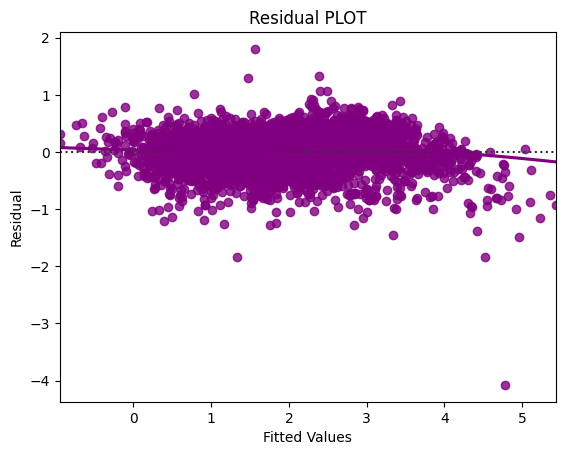

In [160]:
# Predicted values
fitted = olsModel_2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x=fitted, y=residuals, color = "purple", lowess = True)

plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

- Assumptions 4 is satisfied by our olsModel2. There is no pattern in the residual vs fitted values plot.

#### **Checking Assumption 5: Normality of error terms**

The residuals should be normally distributed.

<Axes: ylabel='Density'>

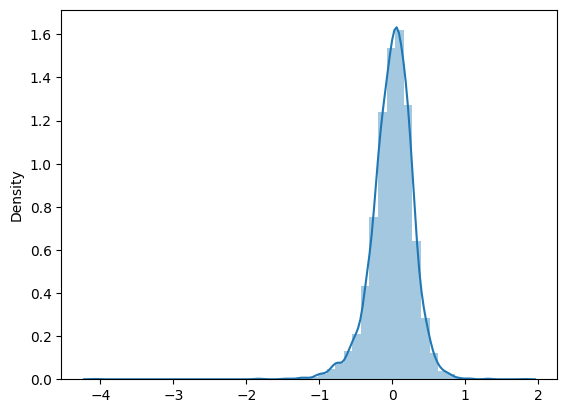

In [163]:
# Plot histogram of residuals
sns.distplot(residuals)

- The residuals have a close to normal distribution. Assumption 5 is also satisfied.
- We should further investigate these values in the tails where we have made huge residual errors.

In [165]:
# Fitting an OLS regression model to predict 'price_log' using all other variables in the DataFrame, excluding 'Price' and 'price_log', to explore their relationships and assess model performance
res_all_fix = ols("price_log ~ " + " + ".join(used_cars_df_new.columns.difference(["Price", "price_log"])), data=used_cars_df_new).fit()

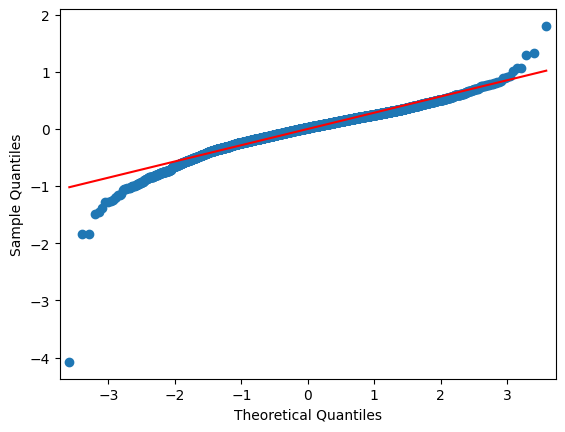

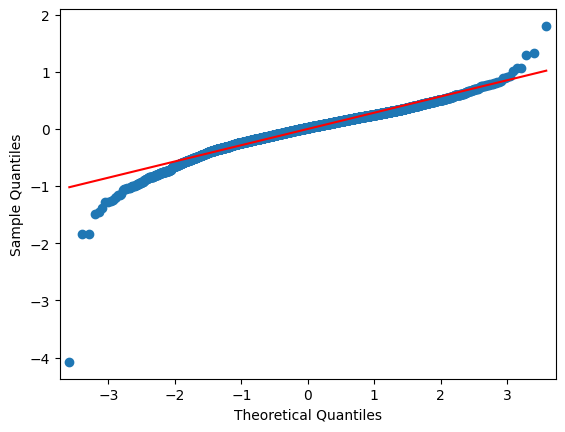

In [166]:
# Generating a Q-Q plot of the residuals from the OLS model to assess normality
sm.qqplot(res_all_fix.resid,line='s')

- While the central portion of the residuals appears to follow a normal distribution reasonably well, the heavy tails and potential outliers suggest that the normality assumption of OLS residuals is not fully satisfied. This may affect tests of significance and confidence intervals that rely on this assumption.

#### **Observations from the model**

1. With our linear regression model we have been able to **capture ~90 variations in our data**.
2. The model indicates that the most significant predictors of the price of used cars are - 
    - The year of manufacturing
    - Number of seats in the car
    - Power of the engine
    - Mileage
    - Kilometers Driven
    - Location
    - Fuel_Type
    - Transmission - Automatic/Manual
    
    The p-values for these predictors are <0.05 in our final model(olsModel_2) except for Location Chennai(p=0.850) and LPG(p=0.724).
   
   
3. Newer cars sell for higher prices. **1 unit increase in the year of manufacture leads to [exp(0.1194) = 1.127 Lakh] increase in the price of the vehicle when everything else is constant.**
It is important to note here that **the predicted values are log(price) and therefore coefficients have to be converted accordingly to understand that influence in Price.**
4. As the **number of seats increases, the price of the car increases - exp(0.0277) = 1.028 Lakhs.**
5. Mileage is inversely correlated with Price. Generally, high Mileage cars are the lower budget cars.
It is important to note here that correlation is not equal to causation. That is to say, an increase in Mileage does not lead to a drop in prices. It can be understood in such a way that the cars with high mileage do not have a high power engine and therefore have low prices.
6. Kilometers Driven have a negative relationship with the price which is intuitive. A car that has been driven more will have more wear and tear and hence sell at a lower price, everything else being constant.
7. The categorical variables are a little hard to interpret. 

#### **Recommendations**

- For a better and more precise prediction, consider taking into account other factors like socio-economical variables.
- Consider using other models more robust and accurate like Decision Tree regressor, Random forest Regressor with Hyperparameter tuning 
- Consider using techniques like Ridge Regression for regularization
- Consider categorising cars into luxurious, cheap and average and use it as a predictor.